# Clock and distance between ends of hands

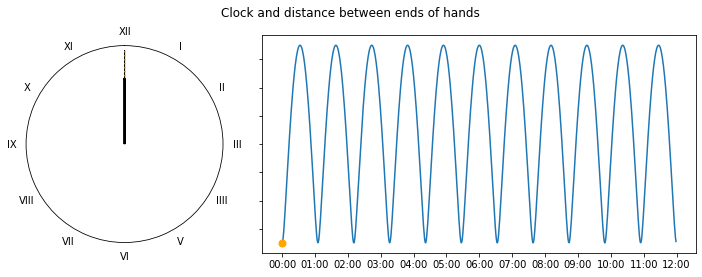

In [1]:
# Display Clock and distance between ends of hands

# imports
from datetime import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.animation import FuncAnimation


# figure and axes
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Clock and distance between ends of hands')
gs = GridSpec(1, 3, hspace=2.0, figure=fig)
# clock
ax1 = fig.add_subplot(gs[:, 0], polar=True)
# graph
ax2 = fig.add_subplot(gs[:, 1:3])


# cartesian positions of hands
def hands(hours, minutes):
    hour_hand_length = 0.7
    minute_hand_length = 1.0
    theta = (-hours/6.0 -minutes/30.0/12.0 + 1/2)*np.pi
    x1 = hour_hand_length * np.cos(theta)
    y1 = hour_hand_length * np.sin(theta)
    theta = (-minutes/30.0 + 1/2)*np.pi
    x2 = minute_hand_length * np.cos(theta)
    y2 = minute_hand_length * np.sin(theta)
    return x1, y1, x2, y2


# data = distance between ends of hands for 12 hours x 60 minutes
array = []
for h in range(12):
    for m in range(60):
        x1, y1, x2, y2 = hands(h, m)
        array.append({'time': time(h, m), 'dist': np.sqrt((x1-x2)**2 + (y1-y2)**2)})
data = pd.DataFrame(array).set_index('time')


# graphics of a frame = (hours, minutes)
def update(frame):
    
    # clock
    ax1.clear()
    ax1.grid(False)
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)
    ax1.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    ax1.set_xticklabels(['XII', 'I', 'II', 'III', 'IIII', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI'])
    ax1.get_yaxis().set_visible(False)
    
    # graph
    ax2.clear()
    data.plot(ax=ax2, legend='')
    ax2.set_xticks([t for i, t in enumerate(data.index) if i % 60 == 0] + [time(12, 0)])
    ax2.set_yticklabels([])
    ax2.set_xlabel('')
    
    # display
    hours, minutes = frame
    # minute hand
    m = minutes/30.0*np.pi
    a1 = ax1.arrow(0, 0, m, 1, color='k')
    # hour hand
    h = hours/6.0*np.pi + m / 12.0
    a2 = ax1.arrow(0, 0, h, 0.7, color='k', lw='2')
    # distance
    a3 = ax1.plot([m, h], [1, 0.7], color='orange', ls=':')
    # spot
    x1, y1, x2, y2 = hands(hours, minutes)
    a4 = ax2.plot(time(hours, minutes), np.sqrt((x1-x2)**2 + (y1-y2)**2), 'o', mfc='orange', mec='orange', markersize=7)
    
    return [a1, a2, a3[0], a4[0]]


frames = [(h, m) for h in range(12) for m in range(60)]

ani = FuncAnimation(fig,
                      update,
                      frames=frames,
                      blit=True,
                      interval=30,
                      repeat=False)

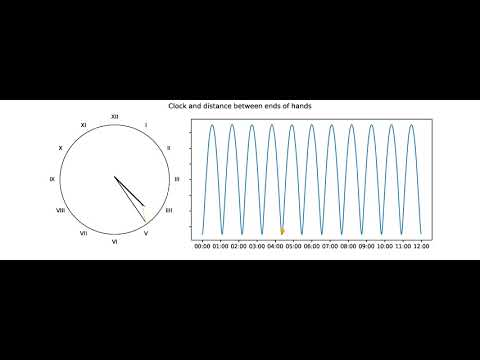

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('n17JSwdXrFk', width=1080, height=360)